In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
train_df = pd.read_csv("data/train.csv")

# Check the structure
print(train_df.head())
print(train_df.columns)

                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  
Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')


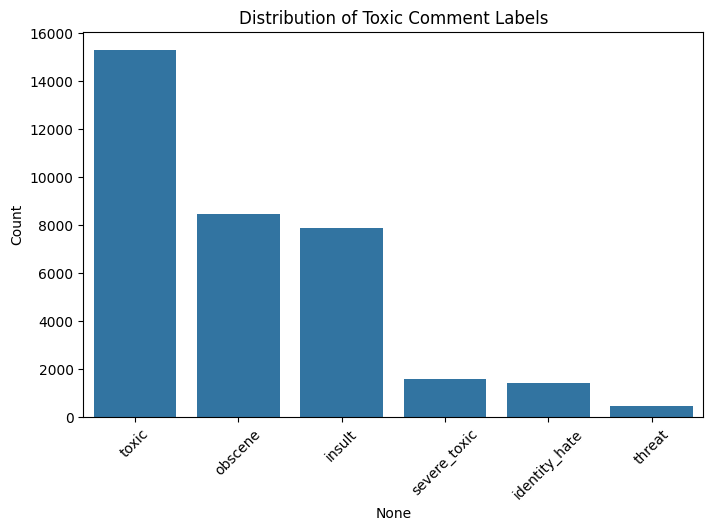

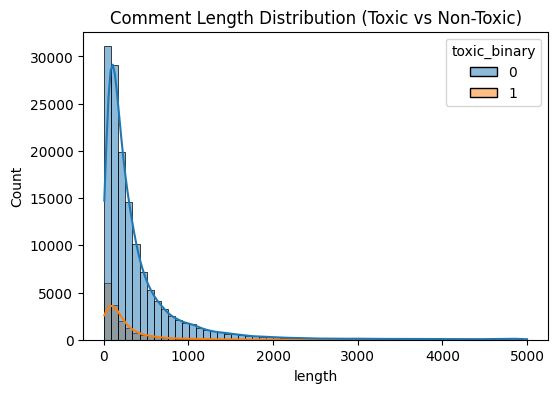

In [3]:
# Columns: id, comment_text, toxic, severe_toxic, obscene, threat, insult, identity_hate
label_cols = train_df.columns[2:]

# Count toxic comments per class
label_counts = train_df[label_cols].sum().sort_values(ascending=False)

# Plot label distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title("Distribution of Toxic Comment Labels")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Add a binary 'toxic' column: 1 if any label is 1
train_df['toxic_binary'] = (train_df[label_cols].sum(axis=1) > 0).astype(int)

# Comment length analysis
train_df['length'] = train_df['comment_text'].apply(len)

plt.figure(figsize=(6,4))
sns.histplot(data=train_df, x='length', hue='toxic_binary', bins=60, kde=True)
plt.title("Comment Length Distribution (Toxic vs Non-Toxic)")
plt.show()

In [4]:
import re

# Function to clean the comment text
def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Remove usernames (e.g., @username)
    text = re.sub(r'@\w+', '', text)
    # Remove special characters, numbers, and punctuation (keep words)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply cleaning function
train_df['clean_text'] = train_df['comment_text'].apply(clean_text)

# Preview a few before/after examples
for i in range(3):
    print(f"Original: {train_df['comment_text'][i]}")
    print(f"Cleaned:  {train_df['clean_text'][i]}")
    print("-" * 80)

Original: Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27
Cleaned:  explanation why the edits made under my username hardcore metallica fan were reverted they werent vandalisms just closure on some gas after i voted at new york dolls fac and please dont remove the template from the talk page since im retired now
--------------------------------------------------------------------------------
Original: D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)
Cleaned:  daww he matches this background colour im seemingly stuck with thanks talk january utc
--------------------------------------------------------------------------------
Original: Hey man, I'm really not trying to edit war. It's just that this guy is consta